# Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline


# Load the Preprocessed Train & Test Data

In [10]:
ticker = "AAPL"
train_df = pd.read_csv(f'data/processed/{ticker}_processed_data_train.csv')
test_df = pd.read_csv(f'data/processed/{ticker}_processed_data_test.csv')


# Confirm Columns

In [11]:
train_df.columns


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Target'], dtype='object')

# Ensure datatime

In [12]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Make the Naive Prediction
The logic:
“If I know today’s Close, I’ll assume tomorrow’s price is the same.”

In [13]:
# Shift Close price forward 1 row (i.e., predict today's Target using yesterday's Close)
test_df['Prediction'] = test_df['Close']
test_df = test_df[:-1]        # drop the last row (no Target)


## Drop First Row (because it has NaN prediction)

In [14]:
test_df = test_df.dropna(subset=['Prediction'])


## Evaluate the Prediction

In [17]:
mse = mean_squared_error(test_df['Target'], test_df['Prediction'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_df['Target'], test_df['Prediction'])
r2 = r2_score(test_df['Target'], test_df['Prediction'])

print(f"Naive Baseline Results:")
print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ MAE: {mae:.4f}")
print(f"✅ R²: {r2:.4f}")

Naive Baseline Results:
✅ RMSE: 2.6321
✅ MAE: 1.9407
✅ R²: 0.9877


## Visualize Prediction vs Actual

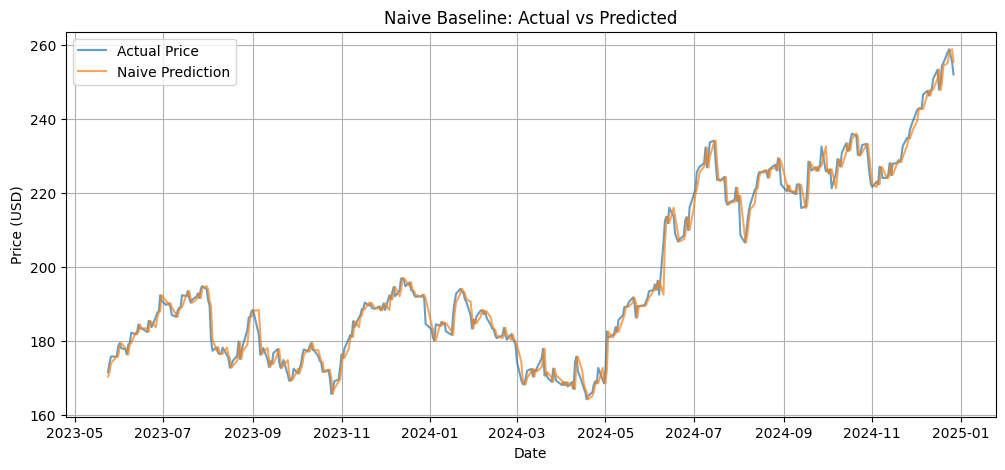

In [18]:
plt.figure(figsize=(12,5))
plt.plot(test_df['Date'], test_df['Target'], label='Actual Price', alpha=0.7)
plt.plot(test_df['Date'], test_df['Prediction'], label='Naive Prediction', alpha=0.7)
plt.title("Naive Baseline: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()